In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Import necessary libraries needed

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Project\Automobile_insurance_fraud.csv.txt")
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Load and read the data

## Data Explanation
- Here we have to create a predictive model that predicts if an insurance claim is fraudulent or not
- There are various columns with date, property_claim, vehicle_claim, accident_date, accident_place, etc., as features to determine the target

Target
- fraud_reported

# Exploratory Data Analysis
## Identifying variables and data types

In [3]:
data.shape

(1000, 40)

The dataframe looks good with good amount of data with 40 features

## Checking data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- There is only one column having NaN value
- 21 columns are having object type of data

In [5]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

- There are 40 columns out of which 39 are the features
- Remove _c39 column since it has no data

In [6]:
data = data.drop(['_c39'], axis = 1)

Removed _c39 column since it has no data

## Check the unique values of object type data

In [7]:
print(data['policy_bind_date'].nunique())
print(data['policy_state'].nunique())
print(data['policy_csl'].nunique())
print(data['insured_sex'].nunique())
print(data['insured_education_level'].nunique())
print(data['insured_occupation'].nunique())
print(data['insured_hobbies'].nunique())
print(data['insured_relationship'].nunique())
print(data['incident_date'].nunique())
print(data['incident_type'].nunique())
print(data['collision_type'].nunique())
print(data['incident_severity'].nunique())
print(data['authorities_contacted'].nunique())
print(data['incident_state'].nunique())
print(data['incident_city'].nunique())
print(data['incident_location'].nunique())
print(data['property_damage'].nunique())
print(data['police_report_available'].nunique())
print(data['auto_make'].nunique())
print(data['auto_model'].nunique())
print(data['fraud_reported'].nunique())

951
3
3
2
7
14
20
6
60
4
4
4
5
7
7
1000
3
3
14
39
2


Since the incident_location is not having any unique value, this will not help in predicting the fradulent, so remoce it

In [8]:
data= data.drop(['incident_location'],axis = 1)

The incident_location is dropped since it does not provide any solution

In [9]:
print(data['policy_bind_date'].unique())
print(data['policy_state'].unique())
print(data['policy_csl'].unique())
print(data['insured_sex'].unique())
print(data['insured_education_level'].unique())
print(data['insured_occupation'].unique())
print(data['insured_hobbies'].unique())
print(data['insured_relationship'].unique())
print(data['incident_date'].unique())
print(data['incident_type'].unique())
print(data['collision_type'].unique())
print(data['incident_severity'].unique())
print(data['authorities_contacted'].unique())
print(data['incident_state'].unique())
print(data['incident_city'].unique())
print(data['property_damage'].unique())
print(data['police_report_available'].unique())
print(data['auto_make'].unique())
print(data['auto_model'].unique())
print(data['fraud_reported'].unique())

['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-04-2004'
 '02-02-20

- The following are not necessary to predict the fradulent, so remove it
    - policy_bind_date
    - policy_number 
    - insured_hobbies
- collision_type, property_damage, police_report_available are having '?' values

In [10]:
data = data.drop(['policy_bind_date','policy_number','insured_hobbies'],axis = 1)

Dropped these 2 columns which is of no use

## Treating NaN values

In [11]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

No NaN values present in the data

## Visualisation of categorical variable

In [12]:
class_data = data[['policy_state','number_of_vehicles_involved','auto_year','umbrella_limit','policy_deductable','witnesses','bodily_injuries','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','fraud_reported','incident_city','property_damage','police_report_available','auto_make','auto_model']]

<function matplotlib.pyplot.show(close=None, block=None)>

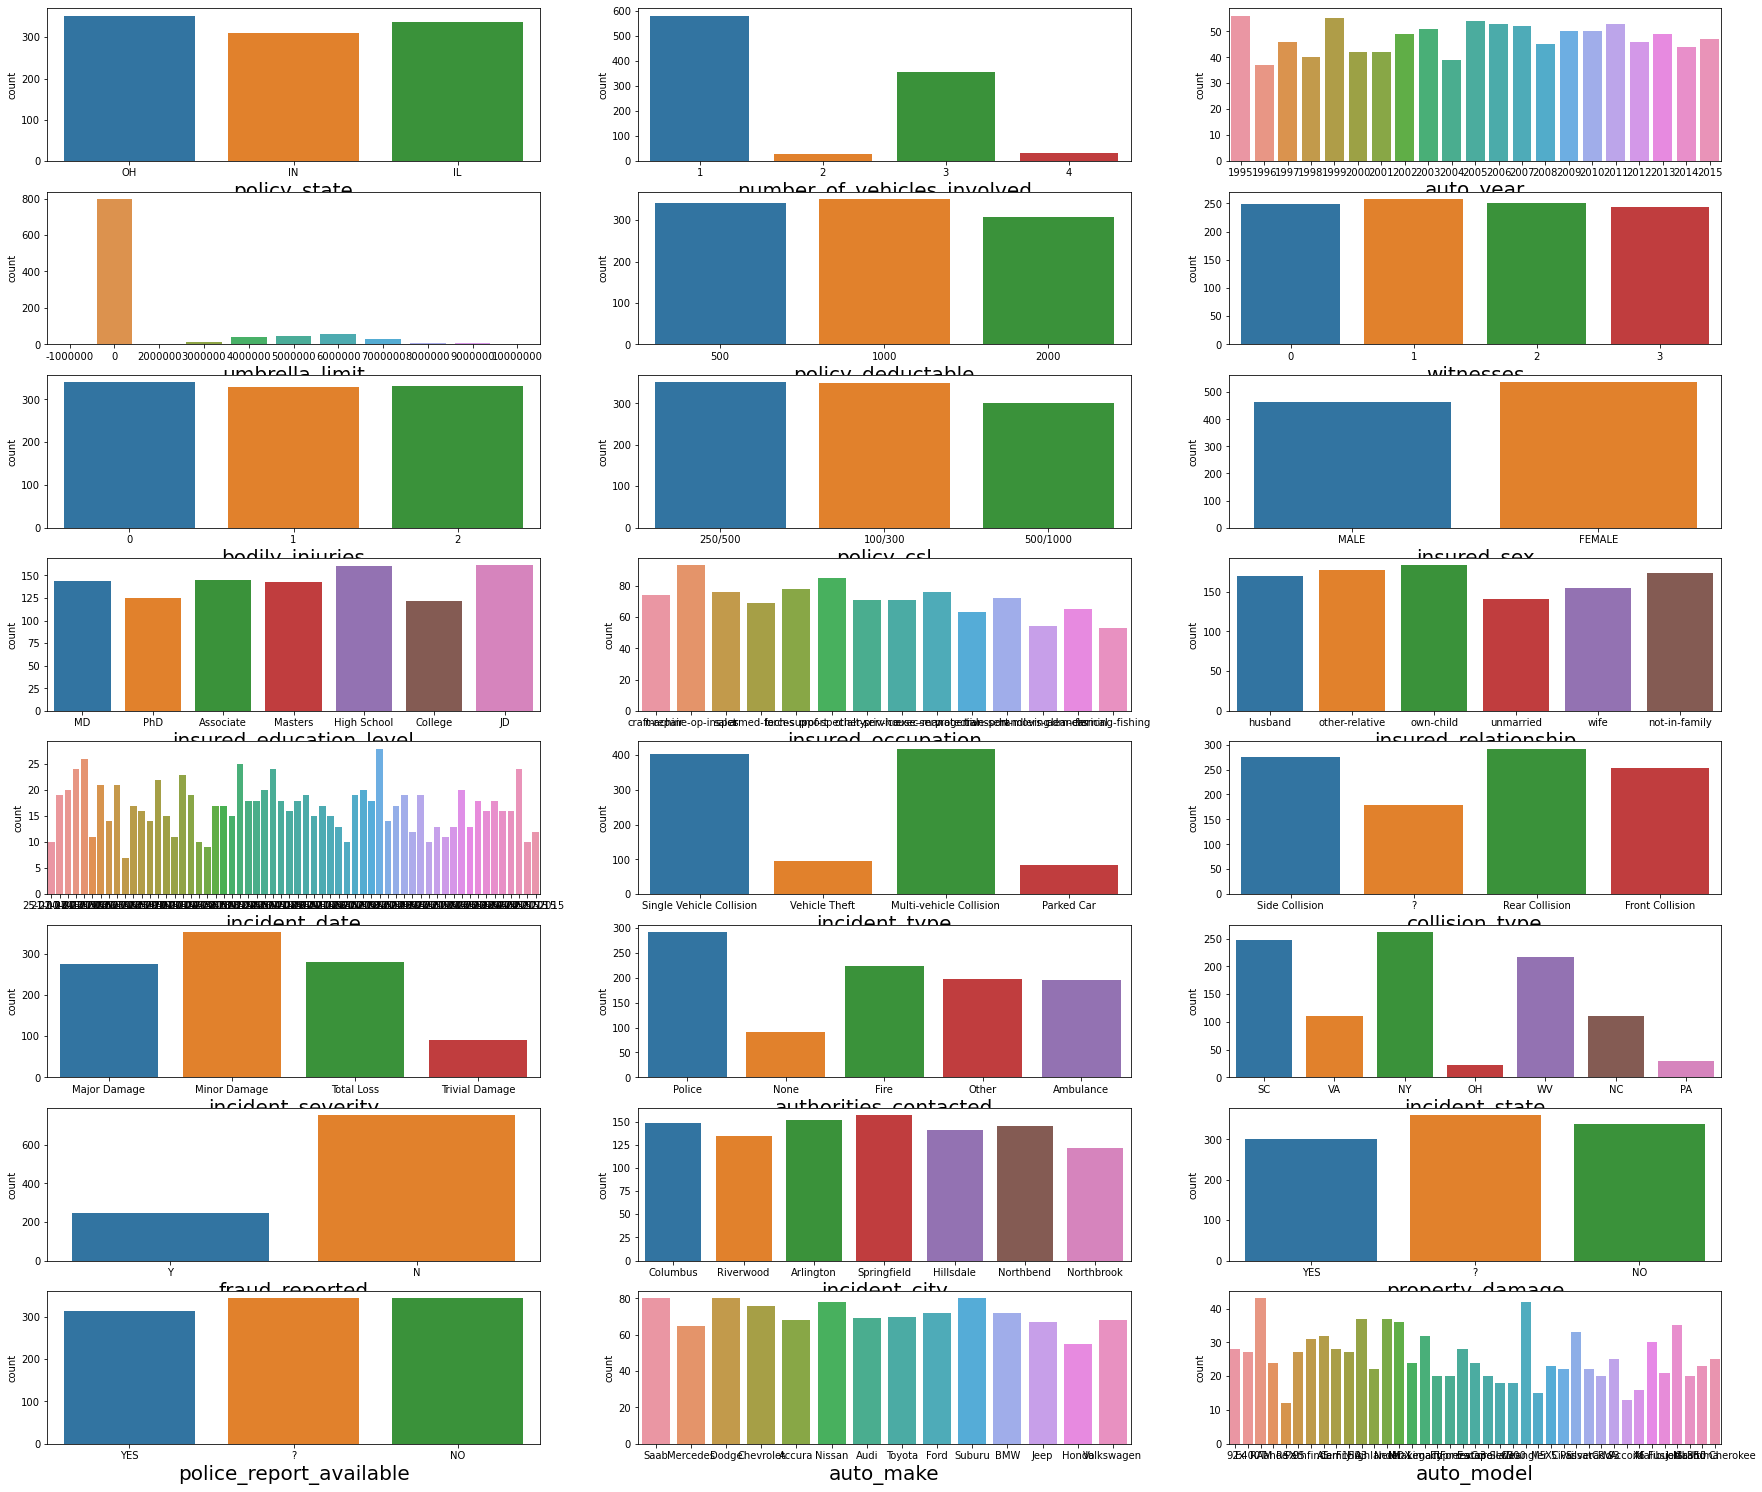

In [13]:
plt.figure(figsize = (30,50), facecolor = 'white')
plotnumber = 1

for column in class_data:
    if plotnumber <=45:
        ax =  plt.subplot(15,3,plotnumber)
        sns.countplot(x = column, data = class_data)
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

- Policy_state looks balanced
- No. of vehicles involved in the accident is 1 having more data
- Making of the automobile is balanced
- Umbrella limit is hhaving 0 as the more no. of data
- Policy deductable looks balanced
- Witnesses looks balanced with equal distribution
- Bodily_injuries looks balanced
- Policy csl also looks balanced
- Insured sex is having more female applicants than male
- Insured education level also looks balanced
- Insured occupation looks balanced
- Insured relationship looks balanced
- There are various incident dates and are mentioned
- Multi vehicle collision and single vehicle collision are somewhat balanced
- Collision type is more or less balanced
- Minor damage is more in incident severity
- Police contacted the individuals undergone accident is more
- Incident state, newy York is more
- Fraud reported is less compared to real accidents
- Incident city is also more or less balanced
- Property damage looks balanced
- Police report available loooks balanced
- Auto make is more or less balanced
- Automodel is also more or less balanced

## Visualisation of Continuous variable

In [14]:
continuous_data = data.drop(['policy_state','number_of_vehicles_involved','auto_year','umbrella_limit','policy_deductable','witnesses','bodily_injuries','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','fraud_reported','incident_city','property_damage','police_report_available','auto_make','auto_model'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

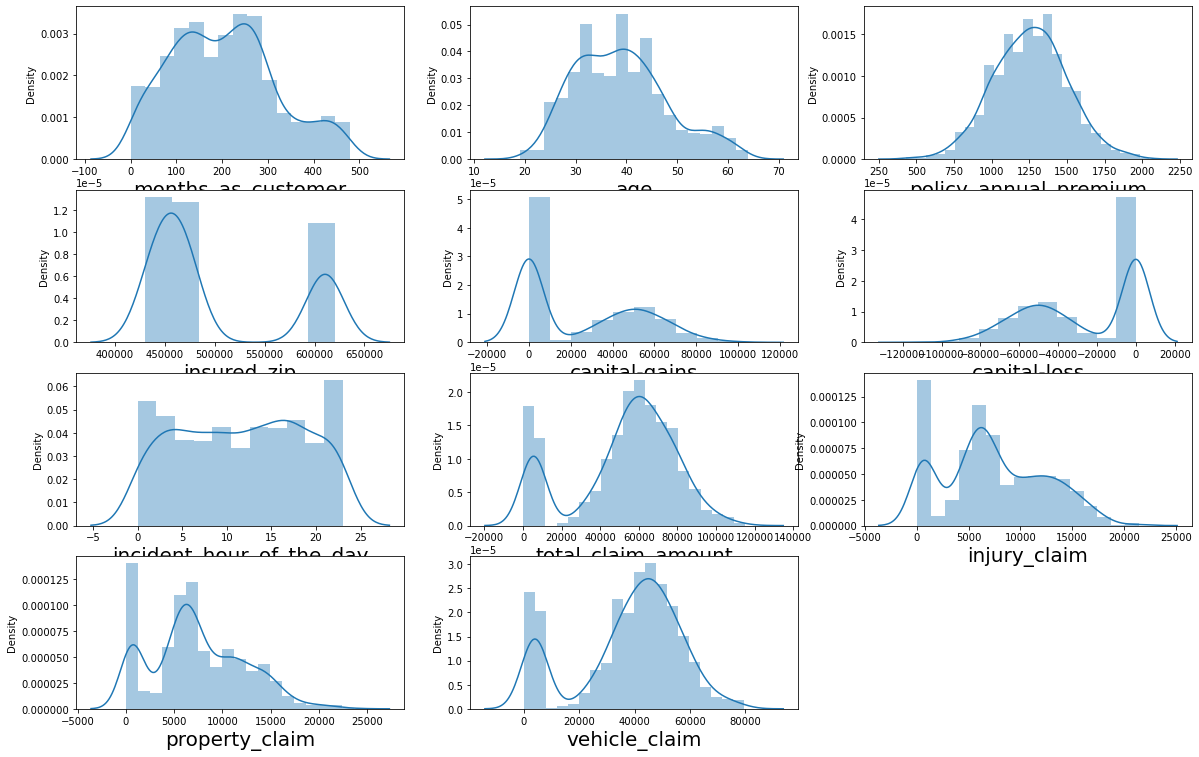

In [15]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in continuous_data:
    if plotnumber <=45:
        ax =  plt.subplot(15,3,plotnumber)
        sns.distplot(continuous_data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

All features looks standradised and normally distributed
- months as cutomer 
- age 
- policy annual premium 
- insured zip 
- capital gains 
- capital-loss 
- incident hour of the day 
- total claim amount 
- injury claim 
- property claim 
- vehicle claim

## Encoding

In [16]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [17]:
for i in data.columns:
    if data[i].dtypes =='object':
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))
data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,2.0,1000,1310.80,0,431289,0.0,5.0,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,0.0,0.0,1000,1436.79,0,608177,0.0,6.0,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,2.0,1.0,500,1383.49,3000000,442797,0.0,5.0,...,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,0.0,2.0,2000,1356.92,5000000,441714,1.0,0.0,...,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


The data is encoded using ordinal encoder
## Describing the data after encoding

In [18]:
data.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


The data has to be standardised. Since all the columns(are encoded) is in integer/float, statistics for all columns is defined
## Correlation

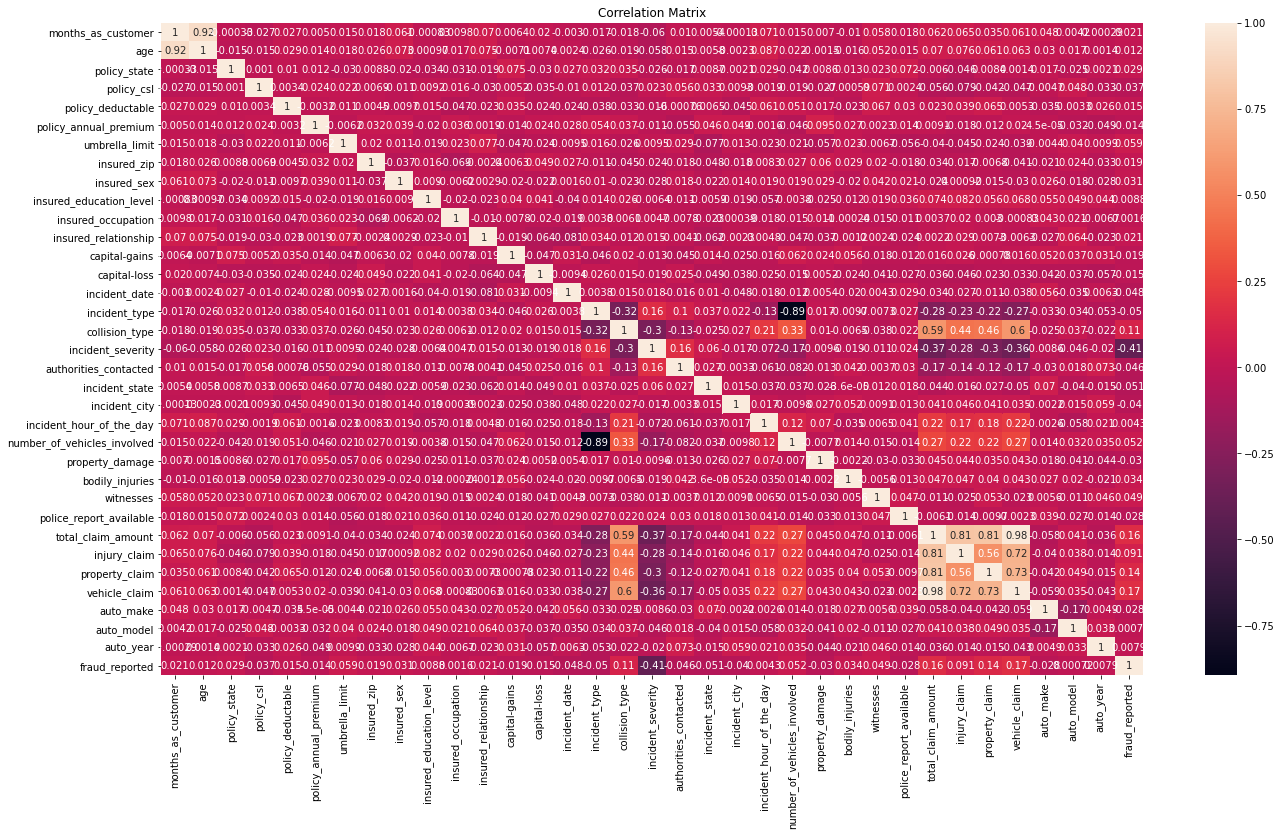

In [19]:
corr_mat = data.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation Matrix')
plt.show()

- Months as customer and age looks heavily correlated
- vehicle claim and total claim amount also looks highly correlated
Check the correlation existence using scatterplot
## Confirming the correlation existence

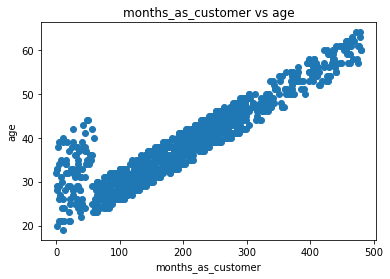

In [20]:
plt.scatter(data.months_as_customer, data.age)
plt.xlabel('months_as_customer')
plt.ylabel('age')
plt.title ('months_as_customer vs age')
plt.show()

This plot confirms the correlation

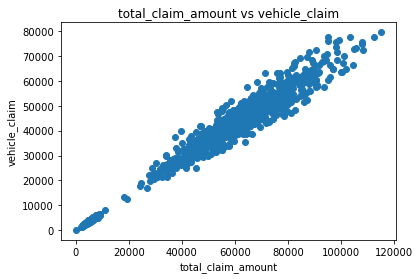

In [21]:
plt.scatter(data.total_claim_amount, data.vehicle_claim)
plt.xlabel('total_claim_amount')
plt.ylabel('vehicle_claim')
plt.title ('total_claim_amount vs vehicle_claim')
plt.show()

This plot also confirms the correlation. 

Remove any one feature from both to avoid biased solution

In [22]:
data = data.drop(['months_as_customer','vehicle_claim'],axis=1)

Dropped 2 columns which are highly correlated
## Collinearity

<function matplotlib.pyplot.show(close=None, block=None)>

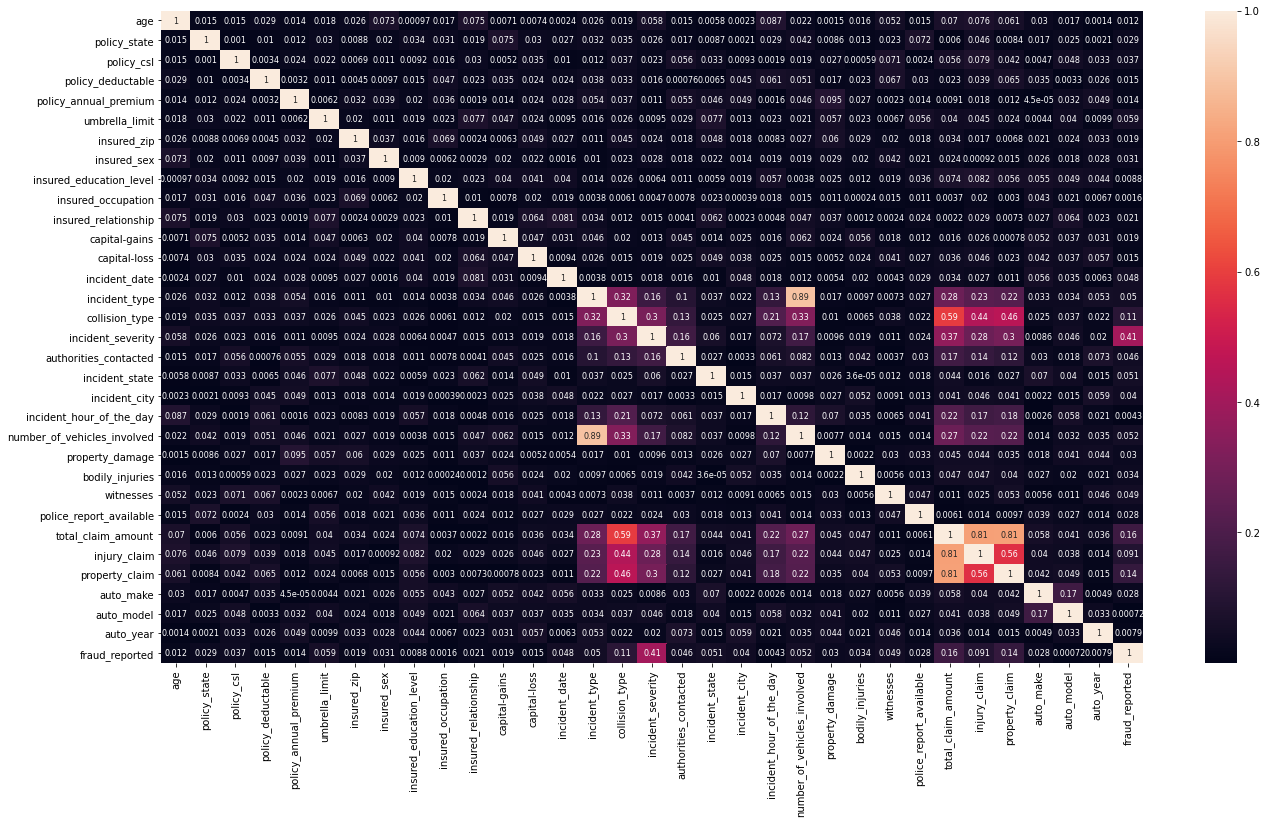

In [23]:
data_corr = data.corr().abs()
plt.figure (figsize = (22,12))
sns.heatmap(data_corr,annot = True, annot_kws = {'size':8}) 
plt.show

There is no high collinearity between variables
## Treat Skewness

In [24]:
x = data.drop('fraud_reported',axis=1)
y = data['fraud_reported']

In [25]:
x.skew()
x.skew().sort_values()

total_claim_amount            -0.594582
capital-loss                  -0.391472
collision_type                -0.193345
incident_state                -0.148865
authorities_contacted         -0.121744
auto_model                    -0.080773
insured_occupation            -0.058881
auto_year                     -0.048289
incident_hour_of_the_day      -0.035584
policy_state                  -0.026177
auto_make                     -0.018797
insured_education_level       -0.000148
policy_annual_premium          0.004402
incident_date                  0.004756
bodily_injuries                0.014777
witnesses                      0.019636
incident_city                  0.049531
police_report_available        0.052967
insured_relationship           0.077488
policy_csl                     0.088928
incident_type                  0.101507
property_damage                0.106418
insured_sex                    0.148630
injury_claim                   0.264811
incident_severity              0.279016


There is no skewness found in the data
## Treat Outliers

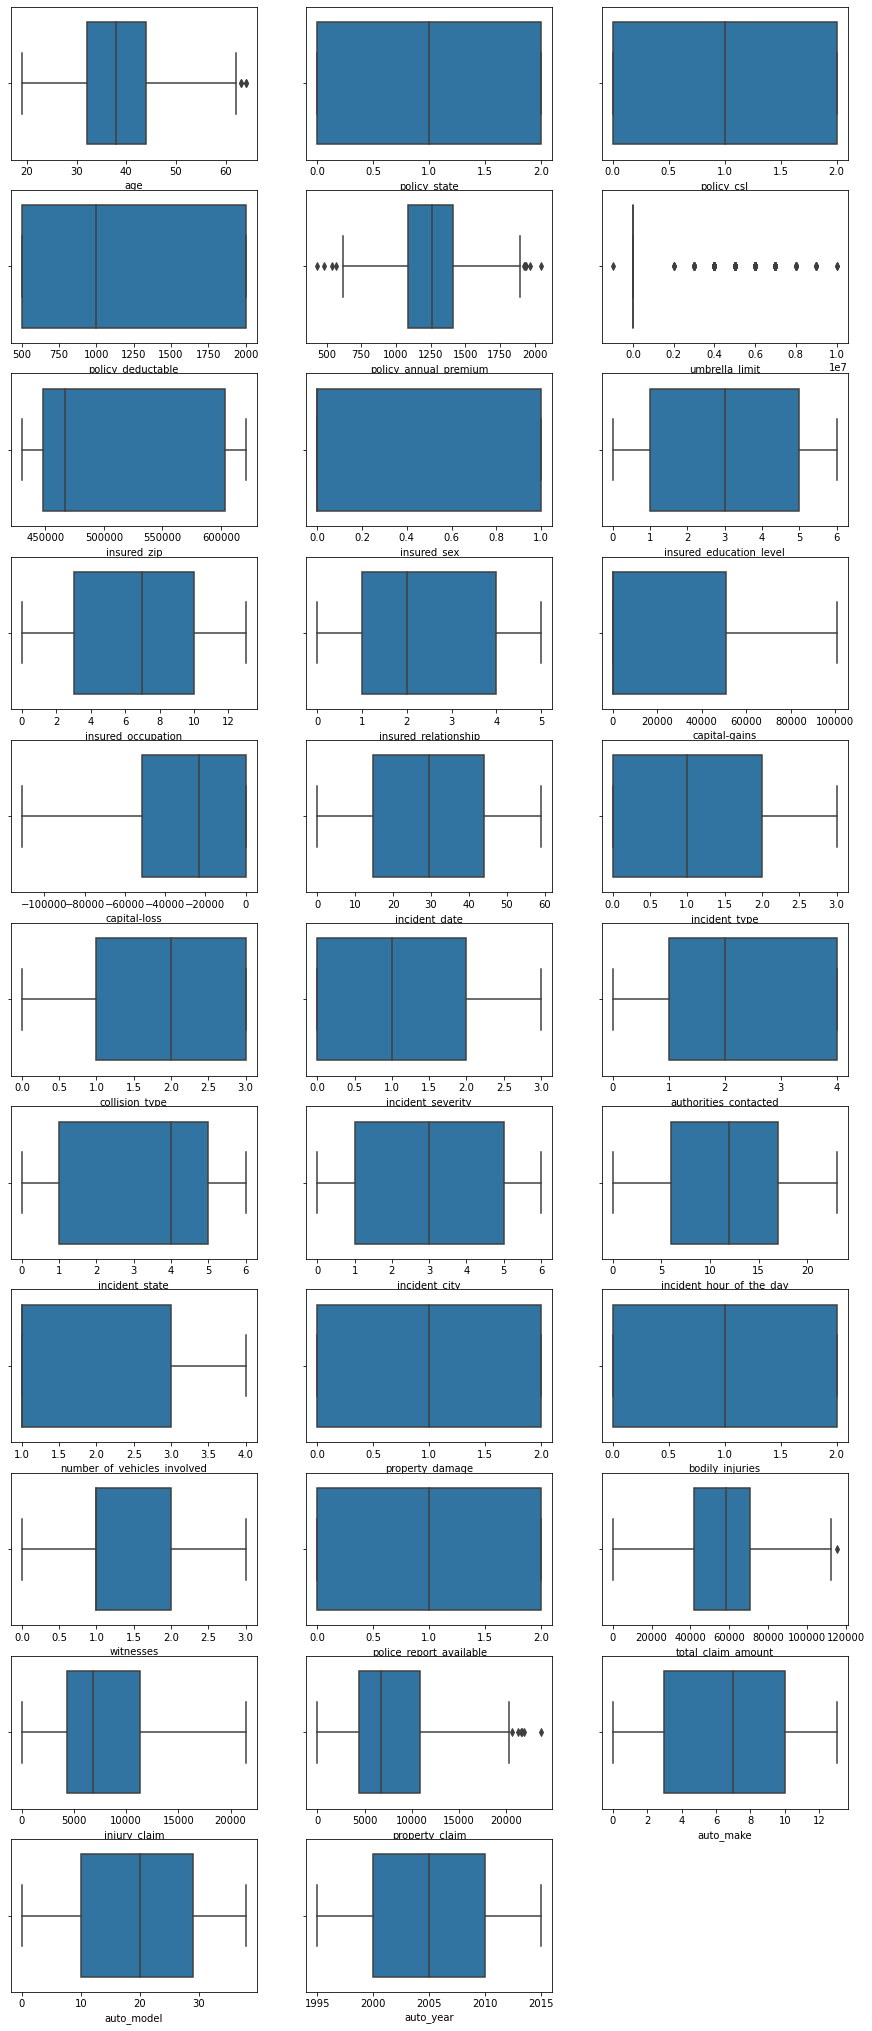

In [26]:
plt.figure(figsize=(15,50))
graph = 1
for column in x:
    if graph<=45:
        ax = plt.subplot(15,3,graph)
        sns.boxplot(x[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

Outliers are found in
- age
- policy annual premium
- umbrella limit
- total claim amount
- property claim
## Quantify

In [27]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

False

In [28]:
data['age_zscore'] = zscore(data['age'])
data['is_outlier'] = data['age_zscore'].apply(lambda x: x<=-3 or x>=3)
data['policy_annual_premium_zscore'] = zscore(data['policy_annual_premium'])
data['is_outlier'] = data['policy_annual_premium_zscore'].apply(lambda x: x<=-3 or x>=3)
data['umbrella_limit_zscore'] = zscore(data['umbrella_limit'])
data['is_outlier'] = data['umbrella_limit_zscore'].apply(lambda x: x<=-3 or x>=3)
data['total_claim_amount_zscore'] = zscore(data['total_claim_amount'])
data['is_outlier'] = data['total_claim_amount_zscore'].apply(lambda x: x<=-3 or x>=3)
data['property_claim_zscore'] = zscore(data['property_claim'])
data['is_outlier'] = data['property_claim_zscore'].apply(lambda x: x<=-3 or x>=3)
data[data['is_outlier']]

,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,auto_make,auto_model,auto_year,fraud_reported,age_zscore,is_outlier,policy_annual_premium_zscore,umbrella_limit_zscore,total_claim_amount_zscore,property_claim_zscore
500,29,2.0,2.0,500,854.58,0,612826,0.0,3.0,2.0,...,6.0,8.0,2003,0.0,-1.088913,True,-1.646523,-0.479476,1.289512,3.373989


In [29]:
data = data.drop([500,591],axis=0)

Outliers are dropped. Check for data loss

In [30]:
data.shape

(998, 39)

In [31]:
Data_loss = ((1000-998)/1000)*100
Data_loss

0.2

Data loss is 2%, which is accpetable. Because, working with outliers will not give good accuracy

# Model Building

In [32]:
x = data.drop('fraud_reported', axis = 1)
y = data['fraud_reported']

## Finding the relationship between dependent and independent variable

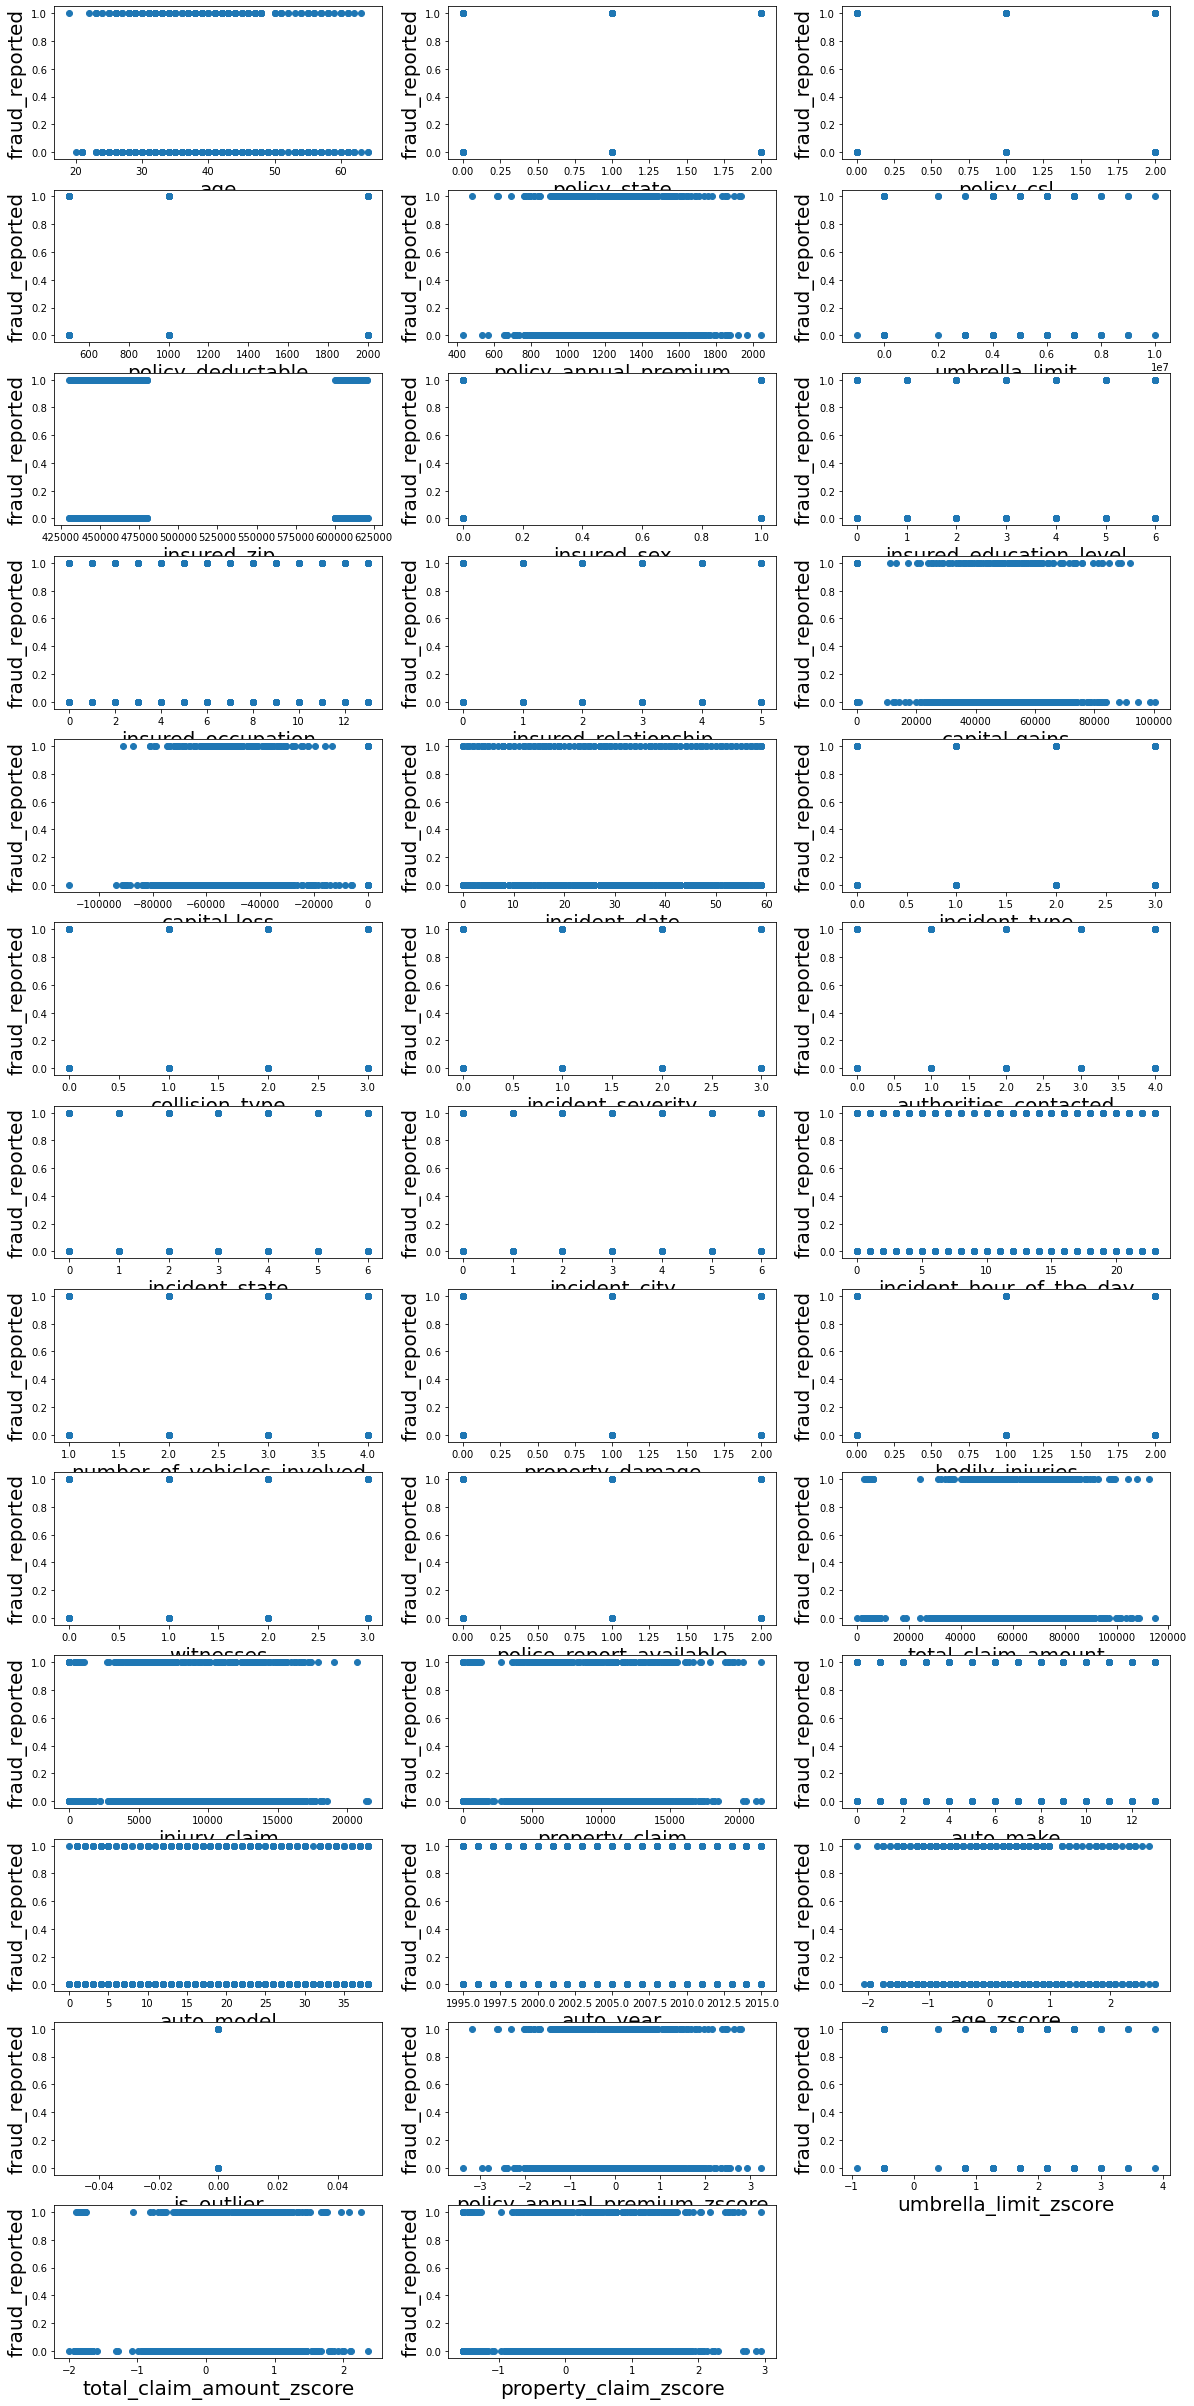

In [33]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber<=45:
        ax = plt.subplot(15,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('fraud_reported', fontsize = 20)
    plotnumber+=1
plt.show()

The relationship looks fairly linear
## Standardisation

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

Thus the data is standardised
## Finding best random state

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [36]:
maxacc = 0
maxrs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxacc:
        maxacc = acc
        maxrs = i
print('Best accuracy is:',maxacc,'on Random State',maxrs)

Best accuracy is: 0.845 on Random State 55


In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = 55)

## Balance the imbalanced dataset

In [38]:
from imblearn.over_sampling import SMOTE
from collections import Counter

Since the fraud_reported values are imbalanced, treat it using SMOTE

In [39]:
print ('Before fit {}'.format (Counter(y_train)))
ove_sam = SMOTE (0.75)
x_train,y_train = ove_sam.fit_resample(x_train,y_train)
print ('After fit {}'.format (Counter(y_train)))

Before fit Counter({0.0: 590, 1.0: 208})
After fit Counter({0.0: 590, 1.0: 442})


## Logistic Regression

In [40]:
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print('Accuracy', accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 83.0
[[141  21]
 [ 13  25]]
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89       162
         1.0       0.54      0.66      0.60        38

    accuracy                           0.83       200
   macro avg       0.73      0.76      0.74       200
weighted avg       0.84      0.83      0.84       200



## Decision tree classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy', accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 74.5
[[130  32]
 [ 19  19]]
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.84       162
         1.0       0.37      0.50      0.43        38

    accuracy                           0.74       200
   macro avg       0.62      0.65      0.63       200
weighted avg       0.78      0.74      0.76       200



## Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('Accuracy', accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 87.5
[[152  10]
 [ 15  23]]
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       162
         1.0       0.70      0.61      0.65        38

    accuracy                           0.88       200
   macro avg       0.80      0.77      0.79       200
weighted avg       0.87      0.88      0.87       200



## SVC

In [43]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Accuracy', accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 81.5
[[147  15]
 [ 22  16]]
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       162
         1.0       0.52      0.42      0.46        38

    accuracy                           0.81       200
   macro avg       0.69      0.66      0.68       200
weighted avg       0.80      0.81      0.81       200



Accuracy score is 0.88 for Random Forest Classifier.
- On comparing all the accuracy scores, Random Forest Classifier has the best accuracy score. Cross check with cross validation score
## Cross-Validation

In [44]:
from sklearn.model_selection import cross_val_score

sc = cross_val_score(LR,x,y,cv=10)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=10)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rf,x,y,cv=10)
print('RFC cvs:',sc2.mean())

sc3 = cross_val_score(svc,x,y,cv=10)
print('SVC cvs:',sc3.mean())

LR cvs: 0.7736161616161616
DT cvs: 0.7245454545454544
RFC cvs: 0.7716060606060606
SVC cvs: 0.7505252525252526


- The cross validation score for Logistic regression is 0.77
    - Accuracy is 0.83
- The cross validation score for Decision tree classifier is 0.72
    - Accuracy is 0.74
- The cross validation score for Random forest classifier is 0.77
    - Accuracy is 0.87
- The cross validation score for SVC is 0.75
    - Accuracy is 0.81
   
On checking with the Accuracy and CV Score, it is clear that Decision tree classifier has approximately same scores for both. So, choose Decision Tree classifier as the best model and do hyperparameter tuning.
## Hyper parameter tuning

In [45]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy'],
             'random_state' : [55]
         }

GVC = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GVC.fit(x_train,y_train)
GVC.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'random_state': 55}

In [46]:
GVC_pred=GVC.best_estimator_.predict(x_test)
accuracy_score(y_test,GVC_pred)

0.855

On tuning the parameters, the score is 0.85. So, use the GVC_pred to evaluate and save the model.
## ROC AUC Score

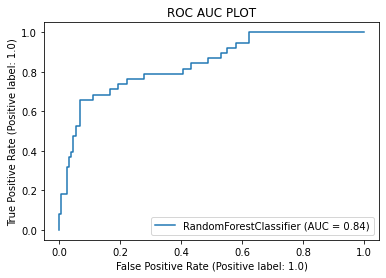

In [47]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GVC.best_estimator_,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

Thus the graph is plotted
## Saving the model

In [48]:
import joblib
joblib.dump(GVC.best_estimator_,'Insurance_Claim_Fraud_Detection.pkl')

['Insurance_Claim_Fraud_Detection.pkl']

Thus the model is saved